In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot
import seaborn as sns
import numpy as np
import os
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Importing dataset
file_path = 'TWO_CENTURIES_OF_UM_RACES.csv'
um_df = pd.read_csv(file_path, low_memory=False)

# Ensure 'Year of event' is an integer (should already be if correctly formatted)
um_df['Year of event'] = pd.to_numeric(um_df['Year of event'], errors='coerce')

# Filter for events between 2000 and 2022
um_df_filtered = um_df[(um_df['Year of event'] >= 2000) & (um_df['Year of event'] <= 2010)]

In [3]:
# Distance-based events dataset
distance_based_events = um_df_filtered[~um_df_filtered['Event distance/length'].str.contains('h')]

# The top 3 distances make up for approximately 40.7% of the distance based events, so now we will focus only on those
# Define the top 3 distances
top_3_distances = ['50km', '100km', '50mi']

# Filter the DataFrame for these top 3 distances
distance_based_events_top_3 = distance_based_events[distance_based_events['Event distance/length'].isin(top_3_distances)]

print(distance_based_events_top_3.head())


         Year of event Event dates                                 Event name  \
3816802           2000  31.12.2000  Across the Years, 24h - 100km Split (USA)   
3816803           2000  31.12.2000   Across the Years, 24h - 50mi Split (USA)   
3816804           2000  31.12.2000   Across the Years, 24h - 50km Split (USA)   
3816805           2000  30.12.2000    50 km Soerendonck (Fat Ass Fifty) (NED)   
3816806           2000  30.12.2000    50 km Soerendonck (Fat Ass Fifty) (NED)   

        Event distance/length  Event number of finishers Athlete performance  \
3816802                 100km                          1           8:22:27 h   
3816803                  50mi                          1           6:25:16 h   
3816804                  50km                          1           3:47:13 h   
3816805                  50km                         46           3:20:01 h   
3816806                  50km                         46           3:20:32 h   

        Athlete club Athlete cou

In [4]:
# Now, distance_based_events_top_3 contains only the entries for the top 3 distances
print(f"Filtered dataset size: {len(distance_based_events_top_3)}")
def time_to_minutes(time_str):
    """Converts a time string with potential day, hour, minute, and second parts into total minutes."""
    # Check if the input is not a string (e.g., NaN values)
    if not isinstance(time_str, str):
        return 0  # Return 0 or an appropriate default value

    days = hours = minutes = seconds = 0
    # Check for and handle the presence of days
    if 'd' in time_str:
        parts = time_str.split('d')
        days = int(parts[0])
        time_str = parts[1].strip()
    if 'h' in time_str:
        time_str = time_str.replace(' h', '')
    
    parts = time_str.split(':')
    if len(parts) == 3:
        hours, minutes, seconds = map(int, parts)
    elif len(parts) == 2:
        hours, minutes = map(int, parts)
    elif len(parts) == 1 and parts[0]:
        hours = int(parts[0])  # Assuming isolated numbers represent hours

    total_minutes = (days * 24 * 60) + (hours * 60) + minutes + (seconds / 60)
    return total_minutes

# Apply the adjusted conversion function to 'Athlete performance'
distance_based_events_top_3['Performance Minutes'] = distance_based_events_top_3['Athlete performance'].apply(time_to_minutes)

# Now the DataFrame should have 'Performance Minutes' populated correctly without raising a TypeError
print(distance_based_events_top_3[['Athlete performance', 'Performance Minutes']].head())

Filtered dataset size: 490938
        Athlete performance  Performance Minutes
3816802           8:22:27 h           502.450000
3816803           6:25:16 h           385.266667
3816804           3:47:13 h           227.216667
3816805           3:20:01 h           200.016667
3816806           3:20:32 h           200.533333


/tmp/ipykernel_186/3269694595.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_based_events_top_3['Performance Minutes'] = distance_based_events_top_3['Athlete performance'].apply(time_to_minutes)


In [5]:
def convert_distance_to_km(distance):
    if isinstance(distance, float) or isinstance(distance, int):
        return distance
    elif 'mi' in distance:
        return float(distance.replace('mi',''))*1.60934
    elif 'km' in distance:
        # Extract the numeric part, no conversion needed
        return float(distance.replace('km', ''))
    else:
        # Handle unexpected formats by returning None or raising an error
        return None
    
distance_based_events_top_3['Event distance/length'] = distance_based_events_top_3['Event distance/length'].apply(convert_distance_to_km)

# Preview the data
print(distance_based_events_top_3.head())

         Year of event Event dates                                 Event name  \
3816802           2000  31.12.2000  Across the Years, 24h - 100km Split (USA)   
3816803           2000  31.12.2000   Across the Years, 24h - 50mi Split (USA)   
3816804           2000  31.12.2000   Across the Years, 24h - 50km Split (USA)   
3816805           2000  30.12.2000    50 km Soerendonck (Fat Ass Fifty) (NED)   
3816806           2000  30.12.2000    50 km Soerendonck (Fat Ass Fifty) (NED)   

         Event distance/length  Event number of finishers Athlete performance  \
3816802                100.000                          1           8:22:27 h   
3816803                 80.467                          1           6:25:16 h   
3816804                 50.000                          1           3:47:13 h   
3816805                 50.000                         46           3:20:01 h   
3816806                 50.000                         46           3:20:32 h   

        Athlete club Athle

/tmp/ipykernel_186/2553990256.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_based_events_top_3['Event distance/length'] = distance_based_events_top_3['Event distance/length'].apply(convert_distance_to_km)


In [6]:
gender_encoded = pd.get_dummies(distance_based_events_top_3['Athlete gender'],prefix='Gender')

# Join the encoded DataFrame with the original DataFrame
df_encoded = distance_based_events_top_3.join(gender_encoded)

X = df_encoded[['Year of event', 'Event distance/length', 'Gender_M']]  # Assuming 'Male' is the column created
y = df_encoded['Performance Minutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')


Mean Squared Error: 23037.110269282057
R^2 Score: 0.646904940535802


In [7]:
# Example: Predicting for the years 2025 to 2050
future_years = np.array([2024, 2026, 2028, 2030, 2032, 2032, 2034])
distances_km = np.array([50, 80.4672, 100])  # The three race distances in km
genders = np.array([0,1])

# Create a DataFrame with all combinations of future years and distances
future_events = pd.DataFrame(list(product(future_years, distances_km, genders)), columns=['Year of event', 'Event distance/length', 'Gender_M'])

# Predict performance times for these future events
future_events['Predicted Performance Minutes'] = model.predict(future_events)

print(future_events)

print(df_encoded.head())


    Year of event  Event distance/length  Gender_M  \
0            2024                50.0000         0   
1            2024                50.0000         1   
2            2024                80.4672         0   
3            2024                80.4672         1   
4            2024               100.0000         0   
5            2024               100.0000         1   
6            2026                50.0000         0   
7            2026                50.0000         1   
8            2026                80.4672         0   
9            2026                80.4672         1   
10           2026               100.0000         0   
11           2026               100.0000         1   
12           2028                50.0000         0   
13           2028                50.0000         1   
14           2028                80.4672         0   
15           2028                80.4672         1   
16           2028               100.0000         0   
17           2028           

<Figure size 960x720 with 0 Axes>

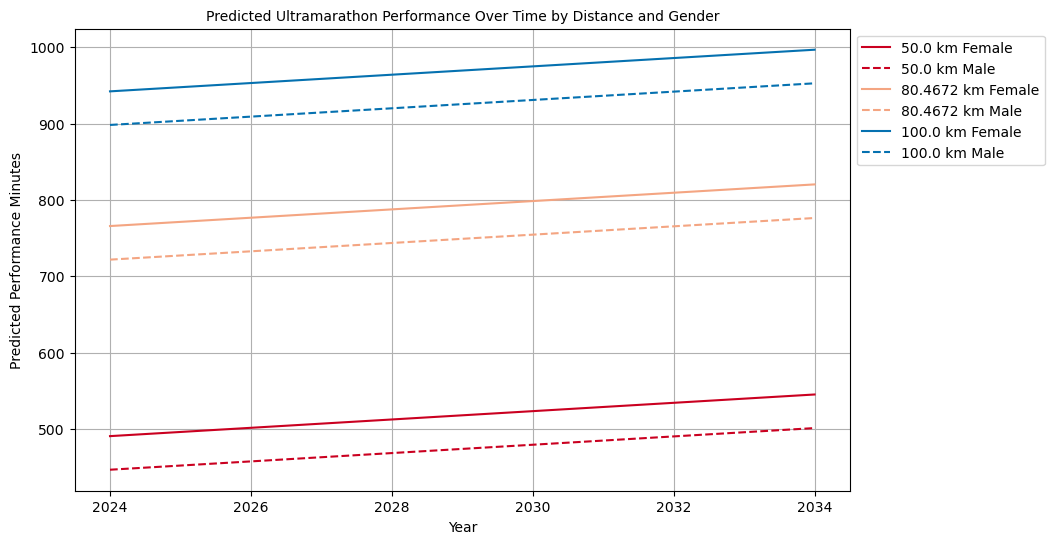

In [9]:
# Unique distances and genders
unique_distances = future_events['Event distance/length'].unique()
unique_genders = future_events['Gender_M'].unique()
        
matplotlib.rcParams['figure.dpi']

# Adjust DPI for a new figure
plt.figure(dpi=150)  # Adjust as needed for your display

# Plot setup
plt.figure(figsize=(10, 6))
colors = ['#ca0020', '#f4a582', '#0571b0']   # Colors for the different distances
linestyles = ['-', '--']  # Line styles for different genders

# Create a line plot for each distance and gender
for i, distance in enumerate(unique_distances):
    for j, gender in enumerate(unique_genders):
        # Filter the DataFrame for each distance and gender
        mask = (future_events['Event distance/length'] == distance) & (future_events['Gender_M'] == gender)
        df_filtered = future_events[mask].sort_values('Year of event')
        
        # Plot the line
        plt.plot(
            df_filtered['Year of event'], 
            df_filtered['Predicted Performance Minutes'], 
            label=f"{distance} km {'Male' if gender == 1 else 'Female'}",
            color=colors[i],
            linestyle=linestyles[j]
        )

# Configure plot
plt.xlabel('Year', fontsize=10)
plt.ylabel('Predicted Performance Minutes', fontsize=10)
plt.title('Predicted Ultramarathon Performance Over Time by Distance and Gender', fontsize=10)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# Save the figure with a specific DPI
plt.savefig('figure 6.png', dpi=600)

# Show plot
plt.show()

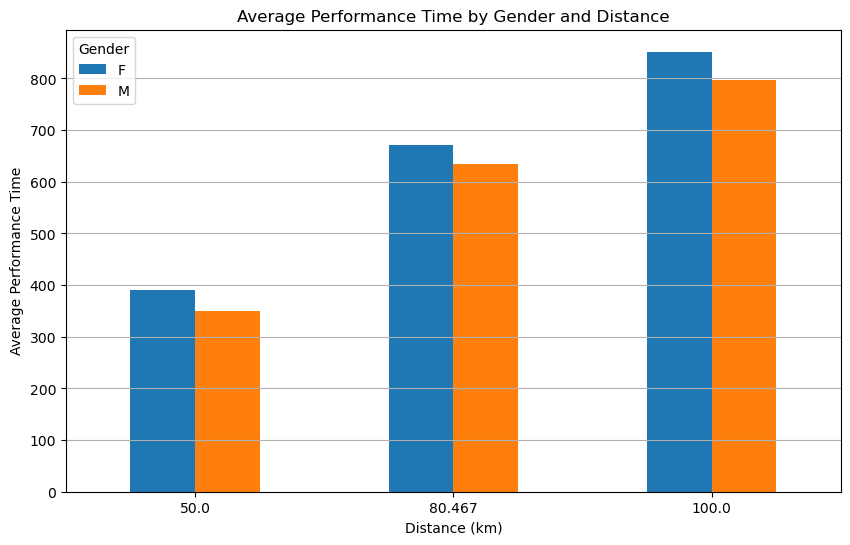

In [10]:
average_performance = distance_based_events_top_3.groupby(['Event distance/length', 'Athlete gender'])['Performance Minutes'].mean().unstack()

average_performance.plot(kind='bar', figsize=(10, 6))

plt.title('Average Performance Time by Gender and Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Average Performance Time')
plt.xticks(rotation=0)  # Keep the distance labels horizontal
plt.legend(title='Gender')
plt.grid(axis='y')

plt.show()

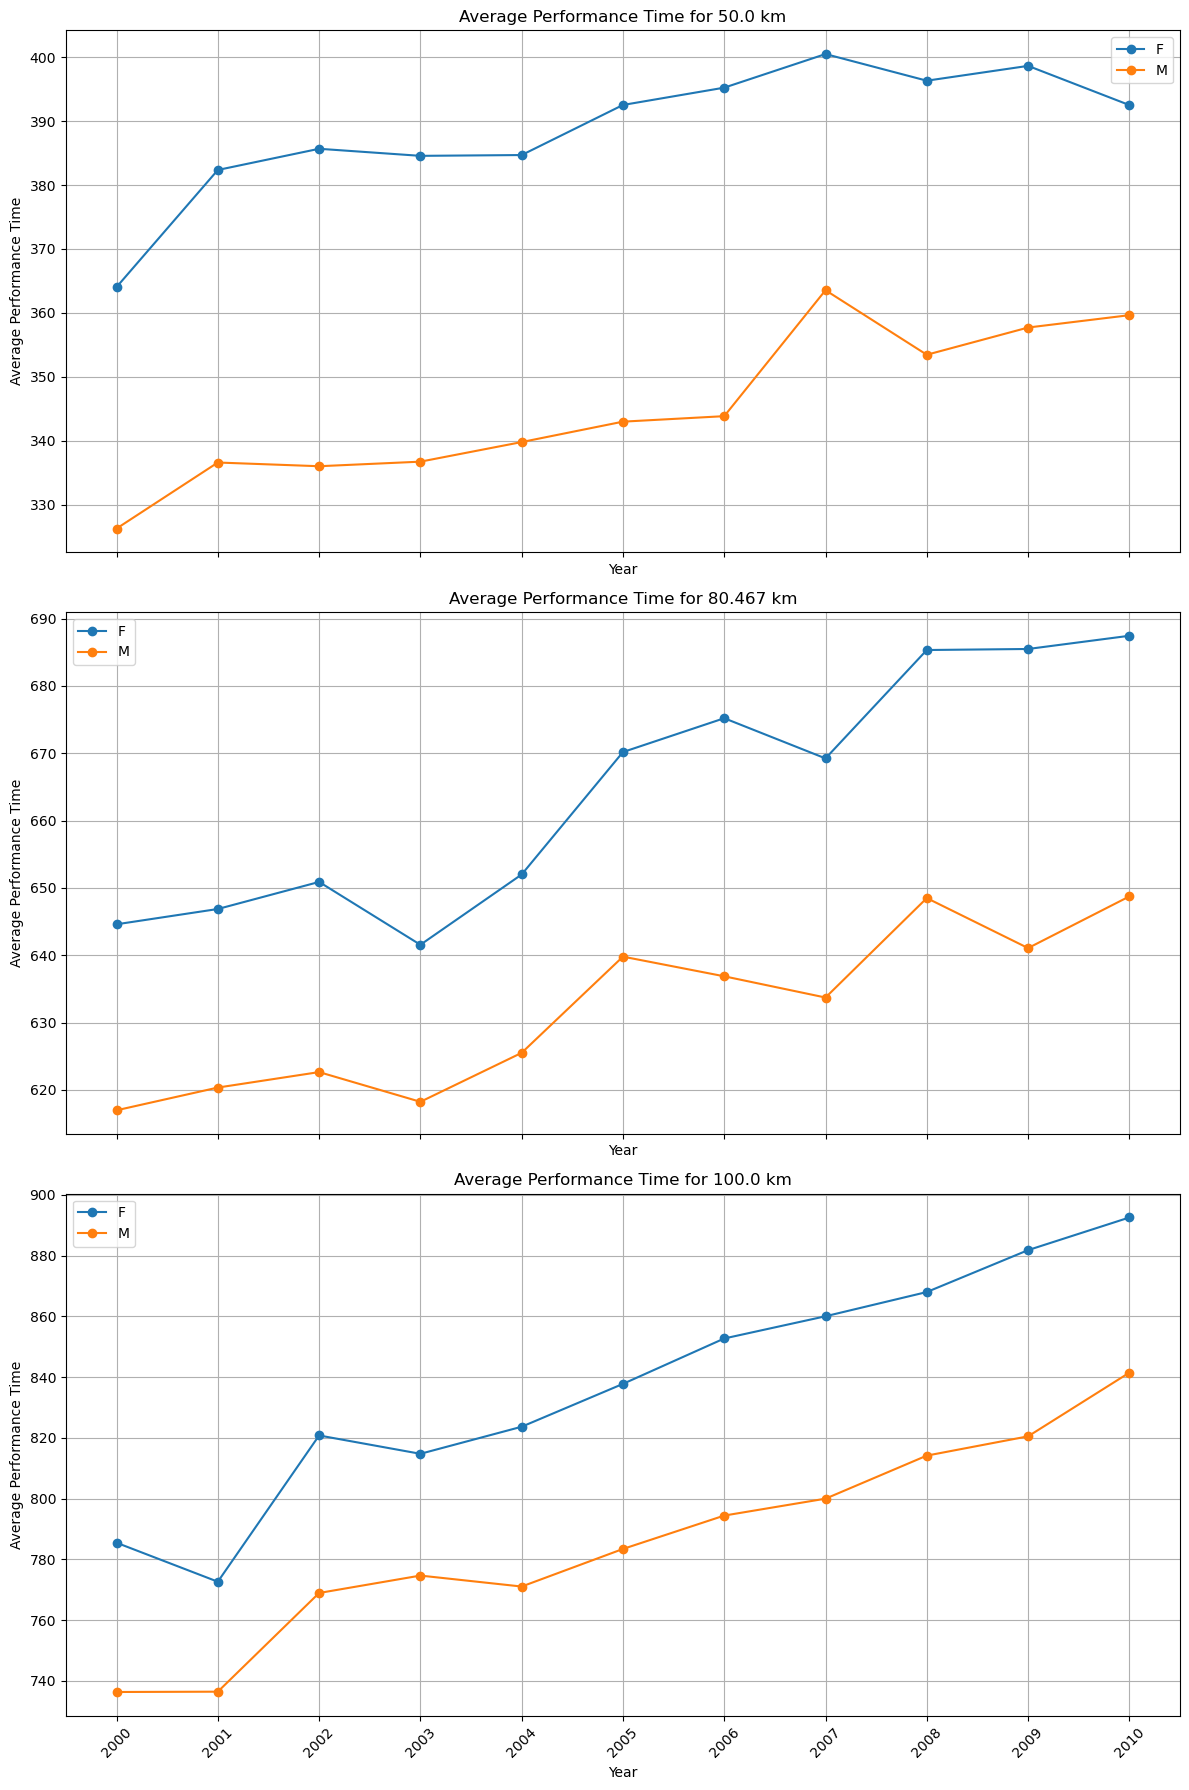

In [11]:
yearly_average = distance_based_events_top_3.groupby(['Year of event', 'Athlete gender', 'Event distance/length'])['Performance Minutes'].mean().reset_index()
# Unique genders and distances
genders = yearly_average['Athlete gender'].unique()
distances = yearly_average['Event distance/length'].unique()
years = yearly_average['Year of event'].unique()

# Create a subplot for each distance
fig, axes = plt.subplots(len(distances), 1, figsize=(12, 6*len(distances)), sharex=True)

if len(distances) == 1:  # Ensure axes is iterable
    axes = [axes]

for i, distance in enumerate(distances):
    ax = axes[i]
    for gender in genders:
        subset = yearly_average[(yearly_average['Athlete gender'] == gender) & (yearly_average['Event distance/length'] == distance)]
        ax.plot(subset['Year of event'], subset['Performance Minutes'], marker='o', label=f'{gender}')
    
    ax.set_title(f'Average Performance Time for {distance} km')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Performance Time')
    ax.legend()
    ax.grid(True)

plt.xticks(years, rotation=45)  # Ensure all years are shown
plt.tight_layout()
plt.show()

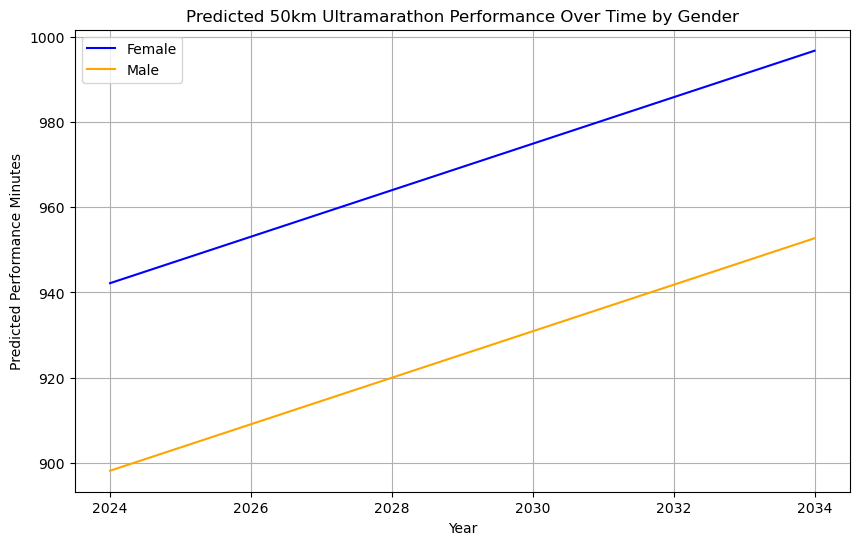

In [12]:
# Filter the DataFrame for only 50 km races
df_50km = future_events[future_events['Event distance/length'] == 100]

# Unique genders (assuming 'Gender_M' column exists where 1 represents male and 0 represents female)
unique_genders = df_50km['Gender_M'].unique()

# Plot setup
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange']  # Adjust colors if needed; one for each gender
linestyles = ['-', '-']  # Line styles for different genders

# Create a line plot for each gender
for j, gender in enumerate(unique_genders):
    # Filter the DataFrame for each gender
    mask = df_50km['Gender_M'] == gender
    df_filtered = df_50km[mask].sort_values('Year of event')
    
    # Plot the line
    plt.plot(
        df_filtered['Year of event'], 
        df_filtered['Predicted Performance Minutes'], 
        label=f"{'Male' if gender == 1 else 'Female'}",
        color=colors[j],
        linestyle=linestyles[j]
    )

# Configure plot
plt.xlabel('Year')
plt.ylabel('Predicted Performance Minutes')
plt.title('Predicted 50km Ultramarathon Performance Over Time by Gender')
plt.legend()
plt.grid(True)

# Show plot
plt.show()